In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset 

In [124]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")
Y_test = pd.read_csv("y_test.csv")

In [125]:
X_train.head()

,jenis kelamin,umur,status pernikahan,anggota keluarga,jumlah tanggungan pendidikan,gaji
0,L,40,menikah,4,1,1450000
1,L,55,menikah,3,1,700000
2,L,43,menikah,4,2,1600000
3,L,49,menikah,3,1,800000
4,L,50,menikah,5,3,1200000


In [126]:
jk_dummies = pd.get_dummies(X_train['jenis kelamin'])
sp_dummies = pd.get_dummies(X_train['status pernikahan'])
X_train = pd.concat([X_train,jk_dummies,sp_dummies],axis='columns')
X_train.head(3)

,jenis kelamin,umur,status pernikahan,anggota keluarga,jumlah tanggungan pendidikan,gaji,L,P,menikah,tidak menikah
0,L,40,menikah,4,1,1450000,1,0,1,0
1,L,55,menikah,3,1,700000,1,0,1,0
2,L,43,menikah,4,2,1600000,1,0,1,0


In [127]:
X_train.drop(['jenis kelamin','status pernikahan','P','tidak menikah'],axis='columns',inplace=True)
X_train.head()

,umur,anggota keluarga,jumlah tanggungan pendidikan,gaji,L,menikah
0,40,4,1,1450000,1,1
1,55,3,1,700000,1,1
2,43,4,2,1600000,1,1
3,49,3,1,800000,1,1
4,50,5,3,1200000,1,1


In [128]:
X_test.head()

,jenis kelamin,umur,status pernikahan,anggota keluarga,jumlah tanggungan pendidikan,gaji
0,P,52,tidak menikah,3,2,900000
1,L,44,menikah,3,1,1200000
2,L,30,menikah,2,0,1400000
3,L,35,menikah,4,1,1750000
4,L,29,menikah,2,0,2500000


In [129]:
jk_dummies = pd.get_dummies(X_test['jenis kelamin'])
sp_dummies = pd.get_dummies(X_test['status pernikahan'])
X_test = pd.concat([X_test,jk_dummies,sp_dummies],axis='columns')
X_test.head(3)

,jenis kelamin,umur,status pernikahan,anggota keluarga,jumlah tanggungan pendidikan,gaji,L,P,menikah,tidak menikah
0,P,52,tidak menikah,3,2,900000,0,1,0,1
1,L,44,menikah,3,1,1200000,1,0,1,0
2,L,30,menikah,2,0,1400000,1,0,1,0


In [130]:
X_test.drop(['jenis kelamin','status pernikahan','P','tidak menikah'],axis='columns',inplace=True)
X_test.head()

,umur,anggota keluarga,jumlah tanggungan pendidikan,gaji,L,menikah
0,52,3,2,900000,0,0
1,44,3,1,1200000,1,1
2,30,2,0,1400000,1,1
3,35,4,1,1750000,1,1
4,29,2,0,2500000,1,1


In [131]:
# 1.	normalisasikan dataset iris menggunakan normalisasi minmax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[['umur']])
X_train['umur'] = scaler.transform(X_train[['umur']])

scaler.fit(X_train[['anggota keluarga']])
X_train['anggota keluarga'] = scaler.transform(X_train[['anggota keluarga']])

scaler.fit(X_train[['jumlah tanggungan pendidikan']])
X_train['jumlah tanggungan pendidikan'] = scaler.transform(X_train[['jumlah tanggungan pendidikan']])

scaler.fit(X_train[['gaji']])
X_train['gaji'] = scaler.transform(X_train[['gaji']])


X_train.head()


,umur,anggota keluarga,jumlah tanggungan pendidikan,gaji,L,menikah
0,0.368421,0.444444,0.2,0.03625,1,1
1,0.631579,0.333333,0.2,0.01750,1,1
2,0.421053,0.444444,0.4,0.04000,1,1
3,0.526316,0.333333,0.2,0.02000,1,1
4,0.543860,0.555556,0.6,0.03000,1,1


In [132]:
# 1.	normalisasikan dataset iris menggunakan normalisasi minmax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_test[['umur']])
X_test['umur'] = scaler.transform(X_test[['umur']])

scaler.fit(X_test[['anggota keluarga']])
X_test['anggota keluarga'] = scaler.transform(X_test[['anggota keluarga']])

scaler.fit(X_test[['jumlah tanggungan pendidikan']])
X_test['jumlah tanggungan pendidikan'] = scaler.transform(X_test[['jumlah tanggungan pendidikan']])

scaler.fit(X_test[['gaji']])
X_test['gaji'] = scaler.transform(X_test[['gaji']])


X_test.head()


,umur,anggota keluarga,jumlah tanggungan pendidikan,gaji,L,menikah
0,0.525424,0.50,0.666667,0.072,0,0
1,0.389831,0.50,0.333333,0.096,1,1
2,0.152542,0.25,0.000000,0.112,1,1
3,0.237288,0.75,0.333333,0.140,1,1
4,0.135593,0.25,0.000000,0.200,1,1


In [133]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [134]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [135]:
X_train

array([[0.36842105, 0.63157895, 0.42105263, 0.52631579, 0.54385965,
        0.84210526, 0.45614035, 0.19298246, 0.61403509, 0.61403509,
        0.31578947, 0.10526316, 0.52631579, 0.38596491, 0.57894737,
        0.68421053, 0.56140351, 1.        , 0.45614035, 0.85964912,
        0.77192982, 0.71929825, 0.66666667, 0.05263158, 0.50877193,
        0.71929825, 0.92982456, 1.        , 0.40350877, 0.33333333,
        0.03508772, 0.59649123, 0.59649123, 0.        , 0.52631579,
        0.57894737, 0.47368421, 0.45614035, 0.01754386, 0.        ,
        0.47368421, 0.05263158],
       [0.44444444, 0.33333333, 0.44444444, 0.33333333, 0.55555556,
        0.11111111, 0.33333333, 0.33333333, 0.22222222, 0.44444444,
        0.44444444, 0.11111111, 0.33333333, 0.44444444, 0.44444444,
        0.        , 0.44444444, 0.11111111, 0.44444444, 0.22222222,
        0.55555556, 0.22222222, 0.33333333, 0.        , 0.55555556,
        0.        , 0.22222222, 0.11111111, 0.55555556, 0.33333333,
        0.44444

In [136]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (6, 42)
Shape of Y_train :  (1, 42)
Shape of X_test :  (6, 18)
Shape of Y_test :  (1, 18)


# Logistic Regression Overview :

## Equations :

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ ......... initialize with zeros

$ B = single$  $weight/parameter $

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{n x m}$

$ Y = \begin{bmatrix}. & . & . & . & . \end{bmatrix}_{1 x m}$


$\sigma = \frac{1}{(1 + e^{-x})}  $   ......... (sigmoid function)


A = $\sigma ( W^T*X + b ) $    ........ (probabilistic predictions of shape (1 x m ) )

<img src = "sigmoid.png" width = 400px>


## Cost function :

$ cost = - \frac{1}{m} \sum_{i=1}^m [ y*log(a) + (1 - y)*log(1 - a) ] $

## Gradient Descent 

$dW = \frac{\partial COST }{\partial W} = ( A - Y )*X^T $ ...... shape (1 x n) 

$dB = \frac{\partial COST }{\partial B} = ( A - Y ) $

$W = W - \alpha * dW^T $

$B = B - \alpha * dB $


<img src = "gradient-descent.png" width = 300px>

In [137]:
print(np.array(np.zeros((6,1)),dtype=np.float64))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [138]:
print(np.zeros((6,1)))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [139]:
print(Z = np.dot(np.array(np.zeros((6,1)),dtype=np.float64).T, X) + B)

NameError: name 'X' is not defined

In [140]:
print(np.zeros((6,1)))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


# Model

In [141]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [142]:
X_train[0]

array([0.36842105, 0.63157895, 0.42105263, 0.52631579, 0.54385965,
       0.84210526, 0.45614035, 0.19298246, 0.61403509, 0.61403509,
       0.31578947, 0.10526316, 0.52631579, 0.38596491, 0.57894737,
       0.68421053, 0.56140351, 1.        , 0.45614035, 0.85964912,
       0.77192982, 0.71929825, 0.66666667, 0.05263158, 0.50877193,
       0.71929825, 0.92982456, 1.        , 0.40350877, 0.33333333,
       0.03508772, 0.59649123, 0.59649123, 0.        , 0.52631579,
       0.57894737, 0.47368421, 0.45614035, 0.01754386, 0.        ,
       0.47368421, 0.05263158])

In [143]:
m = X_train.shape[1]
n = X_train.shape[0]

W = np.zeros((n,1))
B = 0
Z = np.dot(W.T, X_train) + 0
Z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [144]:
A = sigmoid(Z)
print(A)

[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5]]


In [145]:
cost = -(1/m)*np.sum( Y_train*np.log(A) + (1-Y_train)*np.log(1-A))
print(cost)

0.6931471805599452


In [146]:
dW = (1/m)*np.dot(A-Y_train, X_train.T)
dB = (1/m)*np.sum(A - Y_train)

W = W - 0.0015*dW.T
B = B - 0.0015*dB

In [147]:
W

array([[ 7.58145363e-05],
       [-1.38888889e-05],
       [-2.50000000e-05],
       [-3.65625000e-05],
       [-1.25000000e-04],
       [-3.57142857e-05]])

In [148]:
s = W.T
s

array([[ 7.58145363e-05, -1.38888889e-05, -2.50000000e-05,
        -3.65625000e-05, -1.25000000e-04, -3.57142857e-05]])

In [149]:
B

3.571428571428571e-05

In [150]:
Z = np.dot(W.T, X_train) + B
Z

array([[-1.09566559e-04, -8.73866083e-05, -1.10713429e-04,
        -9.54584921e-05, -1.07580457e-04,  9.75578647e-05,
         5.50725847e-05, -1.24112035e-04,  7.33122921e-05,
        -9.57626322e-05, -1.18419688e-04, -8.44023529e-05,
         6.54386061e-05, -1.12825151e-04,  3.24912712e-05,
        -3.74126105e-05, -1.11891543e-04,  1.07243425e-04,
        -1.43153270e-04, -6.65687701e-05, -9.19347351e-05,
        -8.17523755e-05, -8.63717617e-05, -8.84032880e-05,
        -1.10789054e-04,  8.93334862e-05, -5.98773580e-05,
         1.08340300e-04, -1.12352735e-04,  5.43452307e-05,
         1.94594179e-05, -9.46063836e-05, -1.15150076e-04,
         1.67992587e-05, -9.65553671e-05,  3.08916618e-05,
         2.30025905e-05, -1.13875927e-04, -1.06698546e-04,
        -1.02103866e-04, -1.02363034e-04, -1.27840614e-04]])

In [151]:
a = 1/(1+np.exp(-Z))
a

array([[0.49997261, 0.49997815, 0.49997232, 0.49997614, 0.4999731 ,
        0.50002439, 0.50001377, 0.49996897, 0.50001833, 0.49997606,
        0.4999704 , 0.4999789 , 0.50001636, 0.49997179, 0.50000812,
        0.49999065, 0.49997203, 0.50002681, 0.49996421, 0.49998336,
        0.49997702, 0.49997956, 0.49997841, 0.4999779 , 0.4999723 ,
        0.50002233, 0.49998503, 0.50002709, 0.49997191, 0.50001359,
        0.50000486, 0.49997635, 0.49997121, 0.5000042 , 0.49997586,
        0.50000772, 0.50000575, 0.49997153, 0.49997333, 0.49997447,
        0.49997441, 0.49996804]])

In [152]:
np.exp(-(-3.02946428))

20.68614763742706

In [153]:
Z = np.dot(W.T, X_train) + B
A = sigmoid(Z)
print(A)

[[0.49997261 0.49997815 0.49997232 0.49997614 0.4999731  0.50002439
  0.50001377 0.49996897 0.50001833 0.49997606 0.4999704  0.4999789
  0.50001636 0.49997179 0.50000812 0.49999065 0.49997203 0.50002681
  0.49996421 0.49998336 0.49997702 0.49997956 0.49997841 0.4999779
  0.4999723  0.50002233 0.49998503 0.50002709 0.49997191 0.50001359
  0.50000486 0.49997635 0.49997121 0.5000042  0.49997586 0.50000772
  0.50000575 0.49997153 0.49997333 0.49997447 0.49997441 0.49996804]]


In [154]:
X_train

array([[0.36842105, 0.63157895, 0.42105263, 0.52631579, 0.54385965,
        0.84210526, 0.45614035, 0.19298246, 0.61403509, 0.61403509,
        0.31578947, 0.10526316, 0.52631579, 0.38596491, 0.57894737,
        0.68421053, 0.56140351, 1.        , 0.45614035, 0.85964912,
        0.77192982, 0.71929825, 0.66666667, 0.05263158, 0.50877193,
        0.71929825, 0.92982456, 1.        , 0.40350877, 0.33333333,
        0.03508772, 0.59649123, 0.59649123, 0.        , 0.52631579,
        0.57894737, 0.47368421, 0.45614035, 0.01754386, 0.        ,
        0.47368421, 0.05263158],
       [0.44444444, 0.33333333, 0.44444444, 0.33333333, 0.55555556,
        0.11111111, 0.33333333, 0.33333333, 0.22222222, 0.44444444,
        0.44444444, 0.11111111, 0.33333333, 0.44444444, 0.44444444,
        0.        , 0.44444444, 0.11111111, 0.44444444, 0.22222222,
        0.55555556, 0.22222222, 0.33333333, 0.        , 0.55555556,
        0.        , 0.22222222, 0.11111111, 0.55555556, 0.33333333,
        0.44444

In [155]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

In [156]:
Iterations = 100000
Learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = Learning_rate, iterations = Iterations)

cost after  0 iteration is :  0.6931471805599452
cost after  10000 iteration is :  0.599566923049739
cost after  20000 iteration is :  0.5673866860654536
cost after  30000 iteration is :  0.5526493085270411
cost after  40000 iteration is :  0.5443747816699234
cost after  50000 iteration is :  0.5389940767093138
cost after  60000 iteration is :  0.535096560221123
cost after  70000 iteration is :  0.532042441144394
cost after  80000 iteration is :  0.5295106523811128
cost after  90000 iteration is :  0.5273267620517109


### Cost vs Iteration
Plotting graph to see if Cost Function is decreasing or not

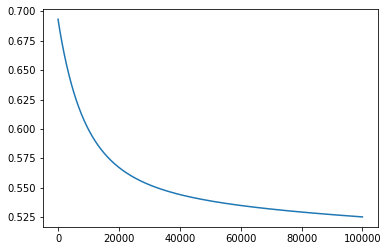

In [157]:
plt.plot(np.arange(Iterations), cost_list)
plt.show()

# Testing Model Accuracy

In [176]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    A = np.array(A, dtype = 'int64')
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 3), "%")

array([[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]],
      dtype=int64)

In [177]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  83.333 %


**Our model accuracy is 91 % on Test dataset. Which is pretty good. !**


## Subscribe to Coding Lane : https://www.youtube.com/channel/UCJFAF6IsaMkzHBDdfriY-yQ?sub_confirmation=1

In [87]:
UsernameList = ["Eclips", "Geany", "Xcode"]
PasswordList = [1324, 1416, 232434]

print("Selamat Datang di Coding.com")


kesempatan = 3
while kesempatan > 0:
    User = input("Username: ")
    Pass = int(input("Password: "))

    for i in UsernameList:    
        if User == i:
            break
    for k in PasswordList:  
        if Pass == k:
            print("Selamat, Kamu Berhasil Log In!")
            break
    
    if User == i and Pass == k:
        break
    elif User != i and Pass != k:
        kesempatan -= 1
        print("Mohon Maaf, Username atau Password yang Kamu Masukkan Salah")
   
if kesempatan == 0:
    print("Kesempatanmu sudah Habis. Silahkan Tunggu 5 menit Lagi")

Selamat Datang di Coding.com
Username: Rizal
Password: 12345678
Mohon Maaf, Username atau Password yang Kamu Masukkan Salah
Username: Eclips
Password: 1324
Selamat, Kamu Berhasil Log In!


In [ ]:
def accuracy(X, Y, W, B):
    print('nilai X', X)
    print('nilai Y', Y)
    print('nilai W', W)
    print('nilai B', B)
    
    Z = np.dot(W.T, X) + B
    print('nilai Z', Z)
    A = sigmoid(Z)
    print('nilai A', A)
    
    A = A > 0.5
    print('boole', A)
    A = np.array(A, dtype = 'int64')
    print('np', A)
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 3), "%")